In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("legal_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,clause_text,clause_type,totalwords,totalletters
0,0,"Make any Investments, except:",investments,4.0,30.0
1,1,No more than 45% of the “value” (as defined i...,investments,76.0,460.0
2,2,"Make or hold any Investments, except:",investments,6.0,38.0
3,3,The SubAdviser is hereby authorized and direc...,investments,228.0,1474.0
4,4,"Make any advance, loan, extension of credit (...",investments,52.0,329.0


In [4]:
# Display the summary statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21187 entries, 0 to 21186
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    21187 non-null  int64  
 1   clause_text   21144 non-null  object 
 2   clause_type   21187 non-null  object 
 3   totalwords    21161 non-null  float64
 4   totalletters  21161 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 827.7+ KB


In [5]:
# Display the summary statistics
df.describe()

,Unnamed: 0,totalwords,totalletters
count,21187.000000,21161.000000,21161.000000
mean,5400.123708,98.227163,606.217712
std,3231.399490,95.225077,589.764603
min,0.000000,0.000000,0.000000
25%,2648.000000,32.000000,195.000000
50%,5296.000000,64.000000,395.000000
75%,7944.500000,129.000000,789.000000
max,12076.000000,1064.000000,2519.000000


In [6]:
# Check for missing values
df.isnull().sum()

Unnamed: 0       0
clause_text     43
clause_type      0
totalwords      26
totalletters    26
dtype: int64

In [7]:
# Frequency of each clause_type
clause_type_counts = df['clause_type'].value_counts()
print(clause_type_counts)

clause_type
base-salary               1010
interest                  1010
investments               1000
ownership_of_shares       1000
compensation              1000
payment                   1000
taxes                     1000
investment-company-act    1000
capitalization             930
loans                      920
Definitions                890
Headings                   860
WHEREAS                    730
Entire                     670
Assignment                 630
Counterparts               630
Representations            610
Termination                590
Severability               580
NOW                        540
Miscellaneous              530
Insurance                  470
Indemnification            370
dividends                  360
Confidentiality            360
Governing                  330
Notices                    320
board                      250
esop                       223
grant                      220
payment_terms              220
vesting                    

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Luvkush sharma\AppData\Local\Temp\ipykernel_3040\1951808837.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='clause_type', y='count', data=clause_type_counts_df, palette='viridis')


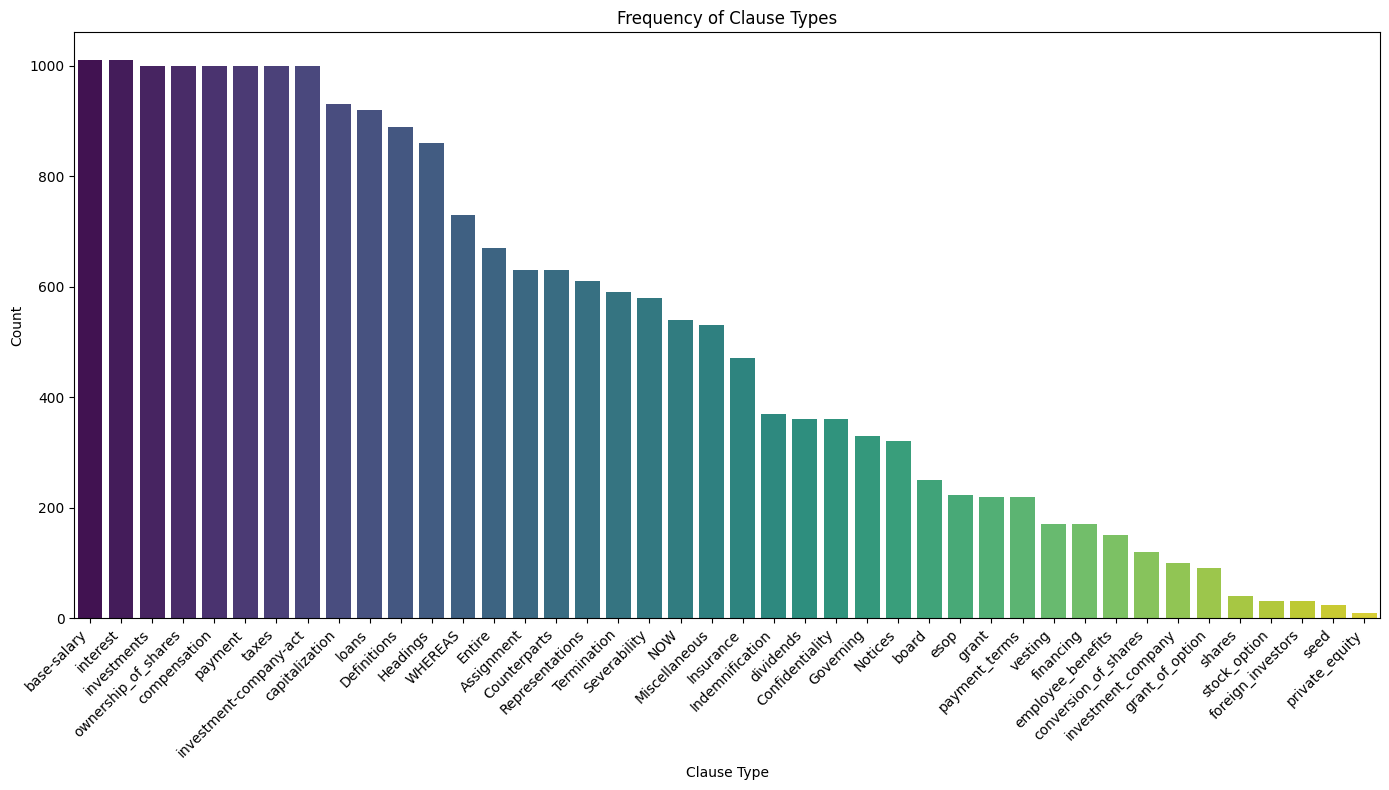

In [16]:
# Create a DataFrame from the clause_type_counts series
clause_type_counts_df = clause_type_counts.reset_index()
clause_type_counts_df.columns = ['clause_type', 'count']

# Create the bar plot
plt.figure(figsize=(14, 8))  # Increase the figure size for better spacing
sns.barplot(x='clause_type', y='count', data=clause_type_counts_df, palette='viridis')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Clause Type')
plt.ylabel('Count')
plt.title('Frequency of Clause Types')
plt.tight_layout()  # Adjust layout to fit labels

plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['clause_type'])
LabelEncoder()

LabelEncoder()

In [18]:
le.classes_

array(['Assignment', 'Confidentiality', 'Counterparts', 'Definitions',
       'Entire', 'Governing', 'Headings', 'Indemnification', 'Insurance',
       'Miscellaneous', 'NOW', 'Notices', 'Representations',
       'Severability', 'Termination', 'WHEREAS', 'base-salary', 'board',
       'capitalization', 'compensation', 'conversion_of_shares',
       'dividends', 'employee_benefits', 'esop', 'financing',
       'foreign_investors', 'grant', 'grant_of_option', 'interest',
       'investment-company-act', 'investment_company', 'investments',
       'loans', 'ownership_of_shares', 'payment', 'payment_terms',
       'private_equity', 'seed', 'shares', 'stock_option', 'taxes',
       'vesting'], dtype=object)

In [19]:
df.columns

Index(['Unnamed: 0', 'clause_text', 'clause_type', 'totalwords',
       'totalletters'],
      dtype='object')

In [20]:
df.duplicated().sum()

0

In [21]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Luvkush
[nltk_data]     sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Luvkush
[nltk_data]     sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
# Identify and remove duplicate rows based on 'clause_text'
df_no_duplicates = df.drop_duplicates(subset='clause_text', keep='first')

In [25]:
# Ensure all 'clause_text' values are strings using .loc
df_no_duplicates.loc[:, 'clause_text'] = df_no_duplicates['clause_text'].astype(str)

In [26]:
df_no_duplicates['clause_text'] 

0                            Make any Investments, except:
1         No more than 45% of the “value” (as defined i...
2                    Make or hold any Investments, except:
3         The SubAdviser is hereby authorized and direc...
4         Make any advance, loan, extension of credit (...
                               ...                        
21182    The Placement Agent (i) will keep the Confiden...
21183    Except as otherwise provided by Legal Requirem...
21184    Each Lender agrees to keep confidential any wr...
21185    Executive agrees that he will not at any time,...
21186    The Executive recognizes that any knowledge an...
Name: clause_text, Length: 21079, dtype: object

In [27]:
# Initialize stop words
stop_words = set(stopwords.words('english'))

In [28]:
# Preprocess text: tokenization, lowercasing, and stopword removal
processed_texts = []
for text in df_no_duplicates['clause_text']:
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    # Removing Stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    processed_texts.append(' '.join(tokens))

In [30]:
# Add the processed texts back to the DataFrame using .loc
df_no_duplicates.loc[:, 'processed_text'] = processed_texts

In [31]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_no_duplicates['processed_text'])

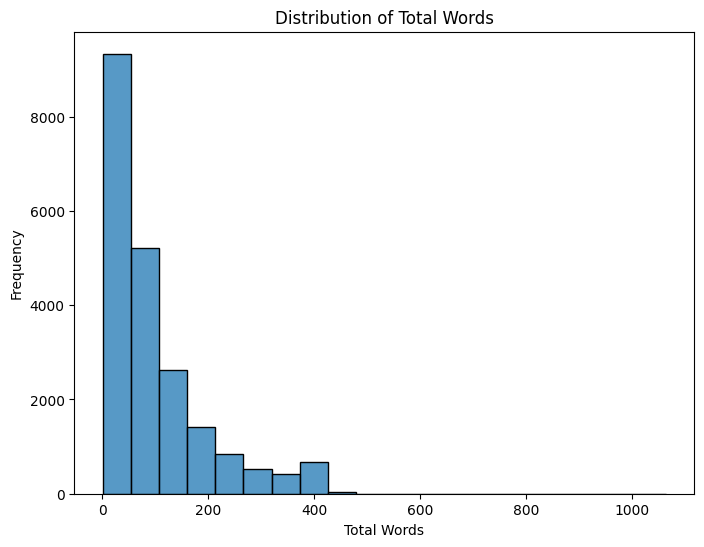

In [45]:
plt.figure(figsize=(8, 6))
sns.histplot(df_no_duplicates['totalwords'], bins=20, edgecolor='k', kde=False)
plt.xlabel('Total Words')
plt.ylabel('Frequency')
plt.title('Distribution of Total Words')
plt.show()

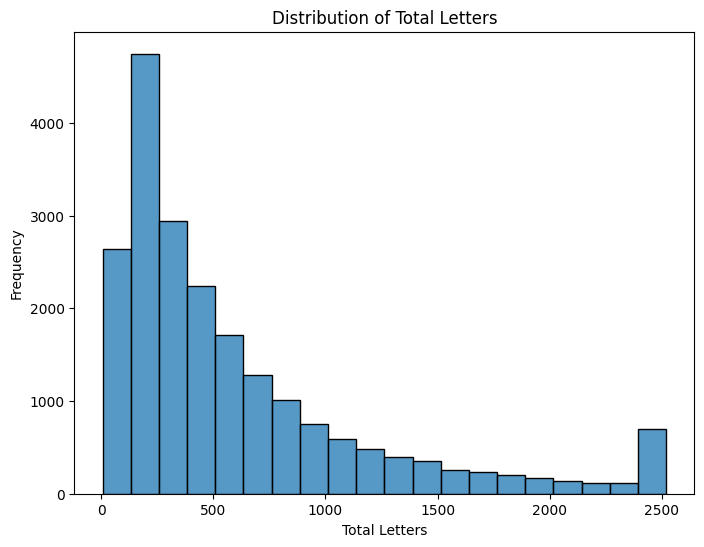

In [44]:
plt.figure(figsize=(8, 6))
sns.histplot(df_no_duplicates['totalletters'], bins=20, edgecolor='k', kde=False)
plt.xlabel('Total Letters')
plt.ylabel('Frequency')
plt.title('Distribution of Total Letters')
plt.show()

In [34]:
# Example of how to view the TF-IDF matrix
print(tfidf_matrix.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [35]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [36]:
# Define the target variable
y = df_no_duplicates['clause_type']

In [37]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df_no_duplicates['processed_text'])

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Train a Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [40]:
LogisticRegression(max_iter=1000)

LogisticRegression(max_iter=1000)

In [41]:
# Predict the clause types on the test set
y_pred = classifier.predict(X_test)

In [42]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9013282732447818
Classification Report:
                         precision    recall  f1-score   support

            Assignment       0.96      0.96      0.96       114
       Confidentiality       0.97      0.96      0.96        71
          Counterparts       0.96      0.97      0.97       113
           Definitions       0.91      0.94      0.93       174
                Entire       0.93      0.95      0.94       132
             Governing       0.91      0.97      0.94        71
              Headings       0.98      0.97      0.97       176
       Indemnification       0.97      0.93      0.95        82
             Insurance       0.96      0.98      0.97       102
         Miscellaneous       0.71      0.53      0.60       104
                   NOW       0.99      0.99      0.99        96
               Notices       0.97      0.97      0.97        72
       Representations       0.97      0.96      0.97       109
          Severability       0.97      0.98      0

c:\Users\Luvkush sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Luvkush sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Luvkush sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

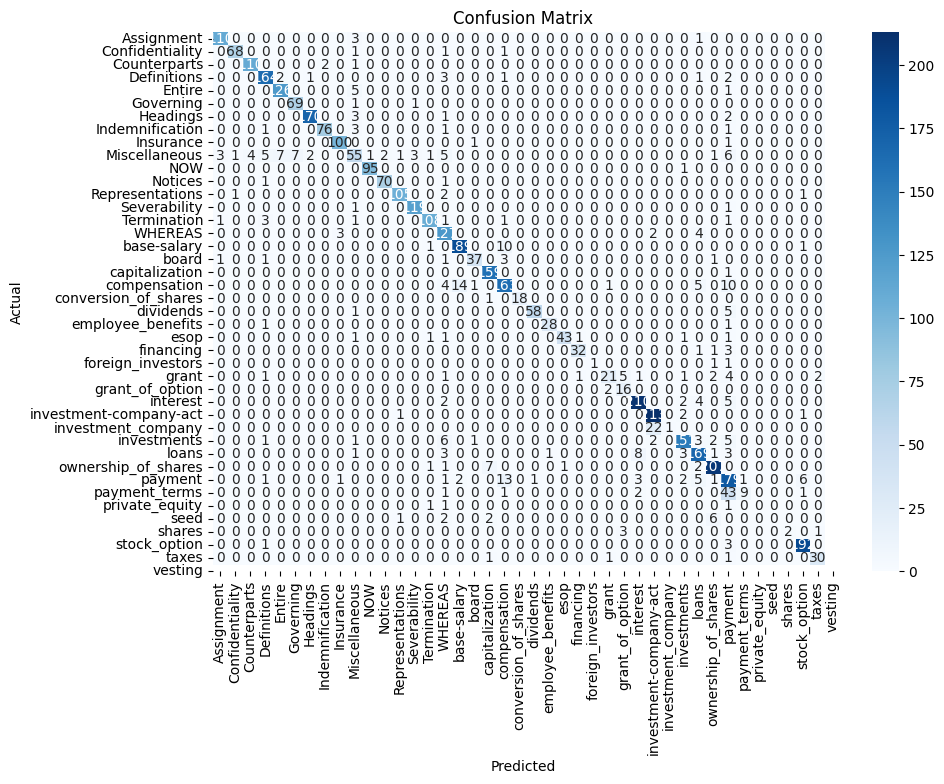

In [43]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a figure and axis with seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [46]:
# Function to predict clause type for a given text
def predict_clause_type(text):
    # Preprocess the text
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Keep alphabetic tokens only
    tokens = [word for word in tokens if word not in stop_words]
    processed_text = ' '.join(tokens)
    
    # Transform the text using the trained TF-IDF vectorizer
    text_tfidf = tfidf_vectorizer.transform([processed_text])
    
    # Predict the clause type using the trained classifier
    prediction = classifier.predict(text_tfidf)
    
    return prediction[0]

In [47]:
# Example usage of the prediction function
example_text = "Each Grantor hereby grants to the Collateral Agent, for the benefit of the Secured Parties, a secure"
predicted_clause_type = predict_clause_type(example_text)
print(f"The predicted clause type for the example text is: {predicted_clause_type}")

The predicted clause type for the example text is: grant


In [48]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [49]:
from difflib import ndiff
# Function to compare two texts and provide a summary of deviations
def compare_texts(template_text, actual_text):
    # Preprocess the texts
    processed_template = preprocess_text(template_text)
    processed_actual = preprocess_text(actual_text)
    
    # Find differences using ndiff
    diff = ndiff(processed_template.split(), processed_actual.split())
    
    deviations = {
        
        'template': template_text,
        'actual': actual_text,
        'diff': []
    }
    
    for line in diff:
        if line.startswith('- '):
            deviations['diff'].append(f"Template has '{line[2:]}' which is missing in Actual.")
        elif line.startswith('+ '):
            deviations['diff'].append(f"Actual has '{line[2:]}' which is missing in Template.")
    
    return deviations

In [50]:
# Example usage of the prediction and comparison functions
template_text1 = "All employees must complete the mandatory training program within the specified timeframe."
actual_text1 = "Employees are required to finish the compulsory training within the designated period."

template_text2 = "The project must be completed by the end of the month to meet our deadline."
actual_text2 = "Completion of the project is due by the month's end to adhere to our timeline."

In [51]:
# Predict clause types
predicted_clause_type1 = predict_clause_type(template_text1)
predicted_clause_type2 = predict_clause_type(template_text2)

In [52]:
# Compare texts and get deviations
deviations1 = compare_texts(template_text1, actual_text1)
deviations2 = compare_texts(template_text2, actual_text2)

In [53]:
# Function to print deviations in the desired format
def print_deviation_summary(deviations, clause_type):
    print(f"1. {clause_type} Clause:")
    print(f"   - Template: {deviations['template']}")
    print(f"   - Actual: {deviations['actual']}")
    print("   - Deviation:")
    for deviation in deviations['diff']:
        print(f"     - {deviation}")

In [54]:
# Print the deviations
print_deviation_summary(deviations1, predicted_clause_type1)
print_deviation_summary(deviations2, predicted_clause_type2)

1. payment Clause:
   - Template: All employees must complete the mandatory training program within the specified timeframe.
   - Actual: Employees are required to finish the compulsory training within the designated period.
   - Deviation:
     - Template has 'must' which is missing in Actual.
     - Template has 'complete' which is missing in Actual.
     - Template has 'mandatory' which is missing in Actual.
     - Actual has 'required' which is missing in Template.
     - Actual has 'finish' which is missing in Template.
     - Actual has 'compulsory' which is missing in Template.
     - Template has 'program' which is missing in Actual.
     - Template has 'specified' which is missing in Actual.
     - Template has 'timeframe' which is missing in Actual.
     - Actual has 'designated' which is missing in Template.
     - Actual has 'period' which is missing in Template.
1. payment Clause:
   - Template: The project must be completed by the end of the month to meet our deadline.
  

In [55]:
# Function to find a relevant text with the same clause type
def find_relevant_text(input_text):
    # Predict the clause type of the input text
    predicted_clause_type = predict_clause_type(input_text)
    
    # Find a relevant text with the same predicted clause type
    relevant_text = df[df['clause_type'] == predicted_clause_type]['clause_text'].iloc[0]
    
    return relevant_text

In [56]:
input_text = "The payment of $12,000 shall be made within 45 days of the invoice date."
relevant_text = find_relevant_text(input_text)
print("Relevant text with the same clause type:")
print(relevant_text)

Relevant text with the same clause type:
 Subject to the provisions of the Warrant and this Agreement, a Warrant may be exercised by the Registered Holder thereof by delivering to the Warrant Agent at its corporate trust department (i) the Definitive Warrant Certificate evidencing the Warrants to be exercised, or, in the case of a Warrant represented by a book-entry, the Warrants to be exercised (the “Book-Entry Warrants”) on the records of the Depositary to an account of the Warrant Agent at the Depositary designated for such purposes in writing by the Warrant Agent to the Depositary from time to time, (ii) an election to purchase (“Election to Purchase”) any Ordinary Shares pursuant to the exercise of a Warrant, properly completed and executed by the Registered Holder on the reverse of the Definitive Warrant Certificate or, in the case of a Book-Entry Warrant, properly delivered by the Participant in accordance with the Depositary’s procedures, and (iii) the payment in full of the Wa

In [57]:
# Preprocess the input text
input_text = "The payment of $12,000 shall be made within 45 days of the invoice date."
input_tokens = word_tokenize(input_text.lower())
input_tokens = [word for word in input_tokens if word.isalpha()]  # Keep alphabetic tokens only
input_processed_text = ' '.join(input_tokens)

In [58]:
from sklearn.metrics.pairwise import cosine_similarity
# Transform the input text using the TF-IDF vectorizer
input_text_tfidf = tfidf_vectorizer.transform([input_processed_text])

# Calculate cosine similarity between the input text and all texts in the dataset
cosine_similarities = cosine_similarity(input_text_tfidf, X).flatten()

In [59]:
# Find the index of the most similar text
most_similar_index = cosine_similarities.argmax()

In [60]:
relevant_text = df.iloc[most_similar_index]['clause_text']
print("Relevant text with the highest similarity:")
print(relevant_text)

Relevant text with the highest similarity:
 The purchase price for the Shares shall be paid simultaneously with Investor’s subscription.
